# 数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import warnings 
warnings.filterwarnings("ignore")

In [2]:
digits=load_digits()
x=digits.data
y=digits.target

In [3]:
x.shape,y.shape

((1797, 64), (1797,))

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=233)

# PCA降维

In [6]:
from sklearn.decomposition import PCA

In [8]:
pca=PCA()
pca.fit(x_train,y_train)

PCA()

## 提取主成分两种方法

### 方法一看图

In [9]:
pca.explained_variance_

array([1.81007327e+02, 1.62245915e+02, 1.41965678e+02, 1.00238468e+02,
       6.81939314e+01, 5.82192560e+01, 5.35849636e+01, 4.34003952e+01,
       4.15334270e+01, 3.77412998e+01, 2.95411763e+01, 2.76709665e+01,
       2.14874615e+01, 2.08074313e+01, 1.75469989e+01, 1.69582705e+01,
       1.61421830e+01, 1.51283885e+01, 1.24902934e+01, 1.10196270e+01,
       1.07320199e+01, 9.44840594e+00, 9.09439397e+00, 8.93322578e+00,
       8.46944961e+00, 7.04767976e+00, 6.87546962e+00, 6.31807832e+00,
       5.77351989e+00, 5.18995665e+00, 4.56492303e+00, 4.35442033e+00,
       4.10520804e+00, 3.82441709e+00, 3.72901451e+00, 3.49442464e+00,
       3.17239040e+00, 2.76786099e+00, 2.63864629e+00, 2.57068504e+00,
       2.24762050e+00, 1.85158687e+00, 1.76138992e+00, 1.70038358e+00,
       1.42366072e+00, 1.27843954e+00, 1.13785918e+00, 8.59404411e-01,
       6.72480430e-01, 4.70872656e-01, 3.01051638e-01, 9.86926152e-02,
       6.68544406e-02, 6.52619492e-02, 5.04686299e-02, 1.88299040e-02,
      

In [10]:
pca.explained_variance_ratio_

array([1.50332671e-01, 1.34750688e-01, 1.17907268e-01, 8.32514175e-02,
       5.66373528e-02, 4.83530495e-02, 4.45041138e-02, 3.60454873e-02,
       3.44949075e-02, 3.13454184e-02, 2.45349402e-02, 2.29816680e-02,
       1.78460592e-02, 1.72812712e-02, 1.45733726e-02, 1.40844138e-02,
       1.34066257e-02, 1.25646353e-02, 1.03736086e-02, 9.15217073e-03,
       8.91330333e-03, 7.84721880e-03, 7.55319995e-03, 7.41934435e-03,
       7.03416265e-03, 5.85333498e-03, 5.71030867e-03, 5.24737647e-03,
       4.79510238e-03, 4.31043349e-03, 3.79132205e-03, 3.61649248e-03,
       3.40951329e-03, 3.17630697e-03, 3.09707192e-03, 2.90223715e-03,
       2.63477688e-03, 2.29880161e-03, 2.19148445e-03, 2.13504036e-03,
       1.86672439e-03, 1.53780515e-03, 1.46289355e-03, 1.41222573e-03,
       1.18239809e-03, 1.06178702e-03, 9.45030304e-04, 7.13764257e-04,
       5.58517607e-04, 3.91075572e-04, 2.50033507e-04, 8.19675350e-05,
       5.55248606e-05, 5.42022429e-05, 4.19158939e-05, 1.56388684e-05,
      

In [15]:
ratio_cum=np.cumsum(pca.explained_variance_ratio_)
ratio_cum

array([0.15033267, 0.28508336, 0.40299063, 0.48624204, 0.5428794 ,
       0.59123245, 0.63573656, 0.67178205, 0.70627696, 0.73762237,
       0.76215731, 0.78513898, 0.80298504, 0.82026631, 0.83483968,
       0.8489241 , 0.86233072, 0.87489536, 0.88526897, 0.89442114,
       0.90333444, 0.91118166, 0.91873486, 0.92615421, 0.93318837,
       0.9390417 , 0.94475201, 0.94999939, 0.95479449, 0.95910492,
       0.96289625, 0.96651274, 0.96992225, 0.97309856, 0.97619563,
       0.97909787, 0.98173264, 0.98403145, 0.98622293, 0.98835797,
       0.9902247 , 0.9917625 , 0.99322539, 0.99463762, 0.99582002,
       0.9968818 , 0.99782684, 0.9985406 , 0.99909912, 0.99949019,
       0.99974023, 0.99982219, 0.99987772, 0.99993192, 0.99997384,
       0.99998948, 0.99999641, 0.99999773, 0.99999898, 0.99999956,
       1.        , 1.        , 1.        , 1.        ])

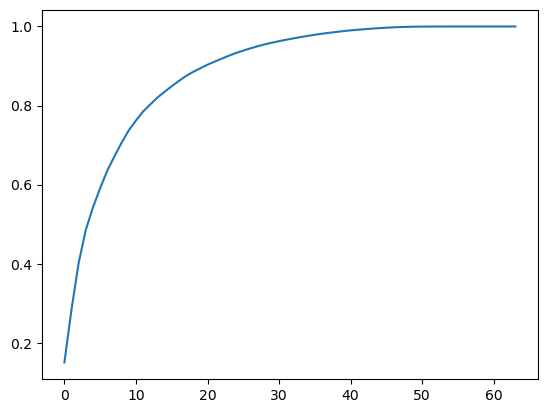

In [19]:
plt.plot(ratio_cum)
plt.show()#图看出二十个成分左右可以保留百分之九十的信息，可以提取主成分二十几个

In [20]:
pca=PCA(20)
pca.fit(x_train)

PCA(n_components=20)

### 方法二直接提取百分之多少

In [21]:
pca=PCA(0.9)
pca.fit(x_train)

PCA(n_components=0.9)

In [22]:
pca.n_components_

21

## 降维

In [23]:
x_train_pca=pca.transform(x_train)
x_test_pca=pca.transform(x_test)

In [25]:
x_train.shape,x_train_pca.shape

((1347, 64), (1347, 21))

# 模型训练

In [26]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(solver='saga',tol=0.001,max_iter=500,random_state=233)

In [29]:
%%time
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

CPU times: total: 938 ms
Wall time: 930 ms


0.9622222222222222

In [30]:
%%time
clf.fit(x_train_pca,y_train)
clf.score(x_test_pca,y_test)

CPU times: total: 344 ms
Wall time: 332 ms


0.9555555555555556

# 可视化

In [31]:
pca=PCA(2)
pca.fit(x_train)

PCA(n_components=2)

In [32]:
x_pca_2d=pca.transform(x_test)

In [33]:
x_pca_2d.shape

(450, 2)

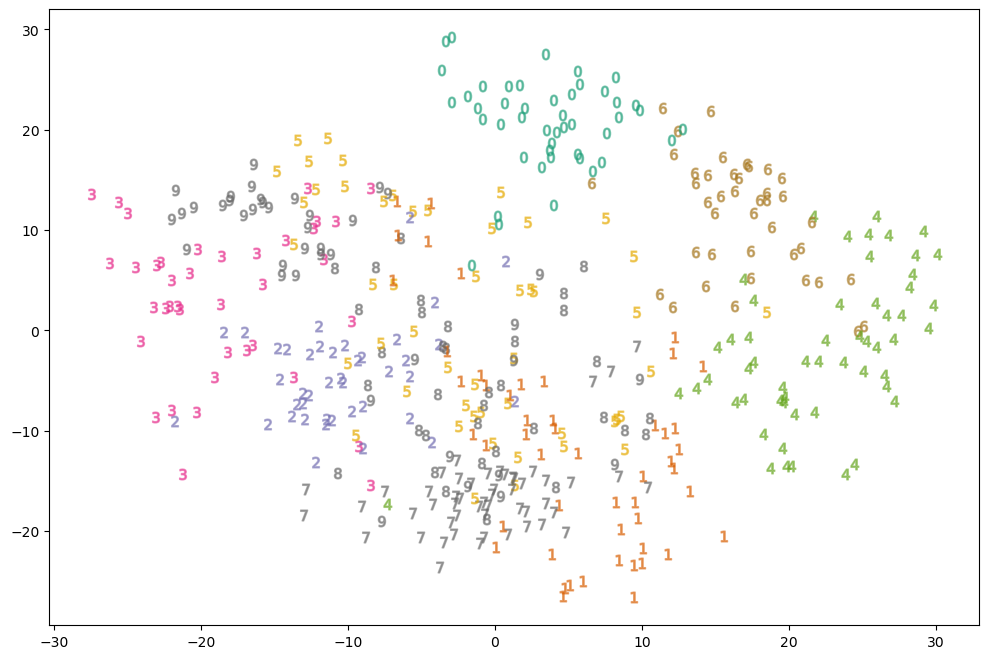

In [34]:
plt.rcParams["figure.figsize"]=(12,8)
for i,digit in enumerate(y_test):
    plt.scatter(x_pca_2d[i,0],x_pca_2d[i,1],color=plt.cm.Dark2(digit),marker="${0}$".format(digit),s=60,alpha=0.5)
plt.show()